<div class="usecase-title">Population Growth & Active Transportation Needs Analysis</div>

<div class="usecase-authors"><b>Authored by: </b> Rhutuvaruni Kharade</div>

<div class="usecase-duration"><b>Duration:</b> {90} mins</div>

<div class="usecase-level-skill">
    <div class="usecase-level"><b>Level: </b>{Intermediate}</div>
    <div class="usecase-skill"><b>Pre-requisite Skills: </b>{Python, and add any more skills needed}</div>
</div>

<div class="usecase-section-header">Scenario</div>

The aim of this usecase is to conduct a comprehensive analysis of population growth trends across different regions within the City of Melbourne. The objective is to discern potential needs for enhancements in transportation services across various modes available throughout the city. As population densities evolve, ensuring commensurate provisions of stations and stops becomes imperative to facilitate public mobility to and from diverse locales. The overarching goal is to identify areas projected to experience significant population surges and to ascertain corresponding requirements for expanded transportation infrastructure in anticipation of such demographic shifts.


User Story:

As a city planner responsible for transportation infrastructure in Melbourne,
I want to analyze population growth trends across different regions within the c ty
so that I can identify areas projected to experience significant population surges.

<div class="usecase-section-header">What this use case will teach you</div>

At the end of this use case you will:
- Python 
- Machine Learning 
- Deep Learning
- Data analysis and visualization skills
- Insights about the datasets used in this project

<div class="usecase-section-header">Analyzing population growth and sufficient amount of transportation services. </div>

{Write your introduction here. Keep it concise. We're not after "War and Peace" but enough background information to inform the reader on the rationale for solving this problem or background non-technical information that helps explain the approach. You may also wish to give information on the datasets, particularly how to source those not being imported from the client's open data portal.}

Using "City of Melbourne Population Forecasts by Small Area 2021-2041" dataset we will look at the forecasted population growth based on various features like location, year and value. This will help us understand what has been forecasted population growth in particular locations for particular years and the value of the growth in those areas. Using "City Circle tram stops" dataset we will look into the existing tram stops based on the locations where they exist. This will give us an insight into the number of tram stops in particular location. Using geolocation we can visualize the exact location of these tram stops to aid us into pointing out potential locations for future tram stops. Using "Bus stops" dataset we can see the location of bus stops within Melbourne city, thsi data can aid us to understand the existing number of bus stops in particular locations and if there are need for any more in the future due to the growth in the population. Dataset "Metro Train Stations with accessibility information"  gives information about the number of metro stations in various location in Melborune city. This dataset also contains the geolocations of the existing metro stations and using this we can predict if more metro stations will be needed in the future due to the growth in population. The initial approach would be to get the basic information about the dataset and understand the features within each dataset. Later figuring out which features are necessary and discarding the rest that are uncessary and only add to the number of dimensionality of the data. Once the features are understood, the goal will be to clean and remove null values with appropriate tools and techniques. After cleaning, a initial basic visualition to understand the overall distributions of the featues and finding out any correlations amongst them. Finally, using machine learning models to predict the number of transportation services that might be needed to aid the population growth within the city in particular locations. Potenitally, using PowerBI to the convey insights to the stakeholders/business owners/policy makers to help them understand the rise in population and their need for public transportation services, thus helping them plan for such resources beforehand.     

<h3> Importing Libraries/ Packages </h3>
<ul>
    <li>This part will focus on importing necessary libraries. </li>
</ul>

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

<h3>Adding datasets</h3>

In [3]:
import requests
import pandas as pd 
from io import StringIO

# function to collect data 
def collect_data(dataset_id):
    base_url = 'https://data.melbourne.vic.gov.au/api/explore/v2.1/catalog/datasets/'
    dataset_id  = dataset_id
    format='csv'

    url = f'{base_url}{dataset_id}/exports/{format}'
    params = {
        'select': '*', 
        'limit' : -1, 
        'lang' : 'en', 
        'timezone' : 'UTC' 
    }

    response = requests.get(url,params=params)

    if response.status_code ==200:
        url_content = response.content.decode('utf-8')
        dataset = pd.read_csv(StringIO(url_content), delimiter=';')
        return dataset
    else:
        print(f"Request failed with status code: {response.status_code}")


In [4]:
# population dataset 
dataset_id = 'city-of-melbourne-population-forecasts-by-small-area-2020-2040'
pop = collect_data(dataset_id)
print(len(pop))
pop.head()


17052


,geography,year,gender,age,value
0,City of Melbourne,2022,Female,Age 0-4,2212.0
1,City of Melbourne,2024,Female,Age 0-4,2818.0
2,City of Melbourne,2029,Female,Age 0-4,4310.0
3,City of Melbourne,2031,Female,Age 0-4,4736.0
4,City of Melbourne,2032,Female,Age 0-4,4931.0


In [5]:
# tram stop dataset 
dataset_id = 'city-circle-tram-stops'
tram = collect_data(dataset_id)
print(len(tram))
tram.head(3)

28


,geo_point_2d,geo_shape,name,xorg,stop_no,mccid_str,xsource,xdate,mccid_int
0,"-37.81922319307822, 144.9614014008424","{""coordinates"": [144.9614014008424, -37.819223...",Market Street / Flinders Street,GIS Team,3,NaN,Mapbase,2011-10-18,3
1,"-37.821539117626855, 144.95356912978238","{""coordinates"": [144.95356912978238, -37.82153...",Victoria Police Centre / Flinders Street,GIS Team,D6,NaN,Mapbase,2011-10-18,6
2,"-37.815426586135686, 144.94512063442602","{""coordinates"": [144.94512063442602, -37.81542...",Central Pier / Harbour Esplanade,GIS Team,D2,NaN,Mapbase,2011-10-18,10


In [6]:
# bus stop dataset 
dataset_id = 'bus-stops'
bus = collect_data(dataset_id)
print(len(bus))
bus.head(3)

309


,geo_point_2d,geo_shape,prop_id,addresspt1,addressp_1,asset_clas,asset_type,objectid,str_id,addresspt,asset_subt,model_desc,mcc_id,roadseg_id,descriptio,model_no
0,"-37.80384165792465, 144.93239283833262","{""coordinates"": [144.93239283833262, -37.80384...",0,76.819824,357,Signage,Sign - Public Transport,355,1235255,570648,NaN,Sign - Public Transport 1 Panel,1235255,21673,Sign - Public Transport 1 Panel Bus Stop Type 13,P.16
1,"-37.81548699581418, 144.9581794249902","{""coordinates"": [144.9581794249902, -37.815486...",0,21.561304,83,Signage,Sign - Public Transport,600,1231226,548056,NaN,Sign - Public Transport 1 Panel,1231226,20184,Sign - Public Transport 1 Panel Bus Stop Type 8,P.16
2,"-37.81353897396532, 144.95728334230756","{""coordinates"": [144.95728334230756, -37.81353...",0,42.177187,207,Signage,Sign - Public Transport,640,1237092,543382,NaN,Sign - Public Transport 1 Panel,1237092,20186,Sign - Public Transport 1 Panel Bus Stop Type 8,P.16


In [7]:
# metro stations dataset 
dataset_id = 'metro-train-stations-with-accessibility-information'
metro = collect_data(dataset_id)
print(len(metro))
metro.head(3)

219


,geo_point_2d,geo_shape,he_loop,lift,pids,station
0,"-37.77839599999999, 145.031251","{""coordinates"": [145.031251, -37.7783959999999...",No,No,Dot Matrix,Alphington
1,"-37.86724899999996, 144.830604","{""coordinates"": [144.830604, -37.8672489999999...",No,No,LCD,Altona
2,"-37.761897999999974, 144.96056099999998","{""coordinates"": [144.96056099999998, -37.76189...",No,No,No,Anstey


<h3>Cleaning dataset</h3>

<h4>1. Getting basic information about the dataset like columns, non null values, datatypes and dimension </h4>

In [8]:
# Population Dataset 
pop.info() 
print()
print(f"Num. of dimensions: {pop.shape}")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17052 entries, 0 to 17051
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   geography  17052 non-null  object 
 1   year       17052 non-null  int64  
 2   gender     17052 non-null  object 
 3   age        17052 non-null  object 
 4   value      16989 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 666.2+ KB

Num. of dimensions: (17052, 5)


In [9]:
# tram stop dataset 
tram.info()
print()
print(f"Num. of dimensions: {tram.shape}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   geo_point_2d  28 non-null     object 
 1   geo_shape     28 non-null     object 
 2   name          28 non-null     object 
 3   xorg          28 non-null     object 
 4   stop_no       28 non-null     object 
 5   mccid_str     0 non-null      float64
 6   xsource       28 non-null     object 
 7   xdate         28 non-null     object 
 8   mccid_int     28 non-null     int64  
dtypes: float64(1), int64(1), object(7)
memory usage: 2.1+ KB

Num. of dimensions: (28, 9)


In [10]:
# metro stations datasetabs 
metro.info()

print()
print(f"Num. of dimensions: {metro.shape}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   geo_point_2d  219 non-null    object
 1   geo_shape     219 non-null    object
 2   he_loop       219 non-null    object
 3   lift          219 non-null    object
 4   pids          219 non-null    object
 5   station       219 non-null    object
dtypes: object(6)
memory usage: 10.4+ KB

Num. of dimensions: (219, 6)


In [11]:
# bus stop dataset information   
bus.info()
print()
print(f"Num. of dimensions: {bus.shape}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   geo_point_2d  309 non-null    object 
 1   geo_shape     309 non-null    object 
 2   prop_id       309 non-null    int64  
 3   addresspt1    309 non-null    float64
 4   addressp_1    309 non-null    int64  
 5   asset_clas    309 non-null    object 
 6   asset_type    309 non-null    object 
 7   objectid      309 non-null    int64  
 8   str_id        309 non-null    int64  
 9   addresspt     309 non-null    int64  
 10  asset_subt    0 non-null      float64
 11  model_desc    309 non-null    object 
 12  mcc_id        309 non-null    int64  
 13  roadseg_id    309 non-null    int64  
 14  descriptio    309 non-null    object 
 15  model_no      309 non-null    object 
dtypes: float64(2), int64(7), object(7)
memory usage: 38.8+ KB

Num. of dimensions: (309, 16)


<h4>2. The summation of null values across features provides insights into the extent of missing data within each feature for a particular dataset   </h4>

In [12]:
pop.isnull().sum() 

geography     0
year          0
gender        0
age           0
value        63
dtype: int64

In [13]:
tram.isnull().sum()

geo_point_2d     0
geo_shape        0
name             0
xorg             0
stop_no          0
mccid_str       28
xsource          0
xdate            0
mccid_int        0
dtype: int64

In [14]:
metro.isnull().sum()

geo_point_2d    0
geo_shape       0
he_loop         0
lift            0
pids            0
station         0
dtype: int64

In [15]:
bus.isnull().sum()

geo_point_2d      0
geo_shape         0
prop_id           0
addresspt1        0
addressp_1        0
asset_clas        0
asset_type        0
objectid          0
str_id            0
addresspt         0
asset_subt      309
model_desc        0
mcc_id            0
roadseg_id        0
descriptio        0
model_no          0
dtype: int64

<h4>3. Handling null values </h4>

<p>Only need for Population, bus and tram dataset. No null values in metro dataset.</p>
<p>Population dataset </p>
<ul>
    <li>Finding out where (which row indexes) the null values in the dataset exist.</li>
    <li>As the data type of missing value columns is numeric, replacing with median</li>
    <li>Rechecking if missing values handled or not</li>
</ul>

In [16]:
# All missing data is numerical hence can be replaced by median 
pop.loc[pop.value.isna(),:]     

# 5574 to 16921 (68 rows)- Mostly West Melbourne (industrial) values are missing

# finding what is the median value for observations from West Melbourne (Industrial) specifically as 
# most missing values are from this area/location alone 
median = float(pop.loc[pop.geography == "West Melbourne (Industrial)"].value.median())
print(median)

# Filling the missing values with median 
pop = pop.fillna(median)

# null val check
pop.isnull().sum()

# all missing values are handled successfully 


0.0


geography    0
year         0
gender       0
age          0
value        0
dtype: int64


<p>Tram dataset </p>
<ul>
    <li>Checking values in "mccid_str" columns to see potential replacement options.</li>
    <li>All values in the column are null so this column can be dropped altogether.</li>
    <li>Rechecking if missing values handled or not (Kernal run all cell required each time).</li>
</ul>

In [17]:
# checkign which columns has missing values 
tram.isna().sum()

# mccid_str 
tram.mccid_str

# all data in this col is null so this entire col can be removed all together
tram = tram.drop(columns="mccid_str", axis=1, inplace=False)
tram.head(5)


,geo_point_2d,geo_shape,name,xorg,stop_no,xsource,xdate,mccid_int
0,"-37.81922319307822, 144.9614014008424","{""coordinates"": [144.9614014008424, -37.819223...",Market Street / Flinders Street,GIS Team,3,Mapbase,2011-10-18,3
1,"-37.821539117626855, 144.95356912978238","{""coordinates"": [144.95356912978238, -37.82153...",Victoria Police Centre / Flinders Street,GIS Team,D6,Mapbase,2011-10-18,6
2,"-37.815426586135686, 144.94512063442602","{""coordinates"": [144.94512063442602, -37.81542...",Central Pier / Harbour Esplanade,GIS Team,D2,Mapbase,2011-10-18,10
3,"-37.813414856197724, 144.94137823870162","{""coordinates"": [144.94137823870162, -37.81341...",New Quay Promenade / Docklands Drive,GIS Team,D10,Mapbase,2011-10-18,11
4,"-37.814591782869805, 144.94655055842398","{""coordinates"": [144.94655055842398, -37.81459...",Etihad Statium / La Trobe Street,GIS Team,D1,Mapbase,2011-10-18,13


In [18]:
# null val check 
tram.isna().sum()

# all missing values handled successfuly

geo_point_2d    0
geo_shape       0
name            0
xorg            0
stop_no         0
xsource         0
xdate           0
mccid_int       0
dtype: int64


<p>Bus dataset </p>
<ul>
    <li>Checking values in "asset_subt" columns to see potential replacement options.</li>
</ul>

In [19]:
bus.isna().sum()

# checkign the asset_subt column
bus.asset_subt

# all null values , so col can be removed 
bus = bus.drop(columns="asset_subt",axis=1,inplace=False )

In [20]:
# null val check
bus.isna().sum()

geo_point_2d    0
geo_shape       0
prop_id         0
addresspt1      0
addressp_1      0
asset_clas      0
asset_type      0
objectid        0
str_id          0
addresspt       0
model_desc      0
mcc_id          0
roadseg_id      0
descriptio      0
model_no        0
dtype: int64

<h4>4. Removing unnecessary features/irrelevant observations/Outliers </h4>

<p>Population dataset </p>
<ul>
    <li>Removing "gender" and "age" column- Aim is to look at the overall growth in population, regardless of gender or age of population </li>
    <li>Scaling the "value" values. </li>
    <li><FONT COLOR="RED">SELF NOTE - (See if "geopgrpahy" column can be geocoded to see the exact location (latitude, longitude) where the values correspond to.) </li>
        <li><FONT COLOR="RED"> SELF NOTE -Find out what is the unit for the "value" columns - is it in ten thousands? millions?  </li>
</ul>

In [21]:
pop=pop.drop_duplicates()

In [22]:
pop=pop[pop.age == "Total population"]

In [23]:
pop = pop.drop(columns=["gender", "age"], axis=1, inplace=False)

In [24]:
# drop check
pop.head(10)

,geography,year,value
5620,City of Melbourne,2021,153674.0
5621,City of Melbourne,2025,178786.0
5622,City of Melbourne,2028,213048.0
5623,City of Melbourne,2029,223062.0
5624,City of Melbourne,2033,257702.0
5625,City of Melbourne,2038,291496.0
5626,City of Melbourne,2040,302903.0
5627,Carlton,2026,20743.0
5628,Carlton,2027,21679.0
5629,Carlton,2031,26375.0


In [25]:
np.sort(pop.year.unique())

array([2021, 2022, 2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030, 2031,
       2032, 2033, 2034, 2035, 2036, 2037, 2038, 2039, 2040, 2041],
      dtype=int64)

<p>Scaling population dataset so that the values are between the 0 to 1  </p>

In [26]:
# min max scalign
pop.value = (pop.value - min(pop.value))/(max(pop.value) - min(pop.value))
pop.head()

# value is now scaled 

,geography,year,value
5620,City of Melbourne,2021,0.498634
5621,City of Melbourne,2025,0.580116
5622,City of Melbourne,2028,0.691288
5623,City of Melbourne,2029,0.723781
5624,City of Melbourne,2033,0.836179


In [27]:
# pip install geopy

<p>Code to convert the names of locations into their corrsponding longitude and latitude</p>

In [28]:
# this code takes too long and consumes resources  if unique() is removed

from geopy.geocoders import Nominatim
location = Nominatim(user_agent="Geopy Library")

main = {}   # the main list that collects latititude and longitude

for city in pop.geography.unique():
    city = str(city)

    try:
        city = str(city) + ",Victoria, Australia"     
        getLoc = location.geocode(city)
        main[city] = (getLoc.latitude,getLoc.longitude)
        # longitude.append(getLoc.longitude)
        print(getLoc.address)
    except:
        main[city] = (None, None)
        print(f"NOT FOUND : {city}")
        pass


City of Melbourne, Victoria, Australia
Carlton, Melbourne, City of Melbourne, Victoria, 3053, Australia
Docklands, Melbourne, City of Melbourne, Victoria, 3008, Australia
East Melbourne, Melbourne, City of Melbourne, Victoria, 3002, Australia
Kensington, Bellair Street, Kensington, Melbourne, City of Melbourne, Victoria, 3031, Australia
Melbourne, City of Melbourne, Victoria, Australia
NOT FOUND : Melbourne (Remainder),Victoria, Australia
North Melbourne, Dryburgh Street, West Melbourne, Melbourne, City of Melbourne, Victoria, 3003, Australia
Parkville, Melbourne, City of Melbourne, Victoria, 3052, Australia
Port Melbourne, Melbourne, City of Port Phillip, Victoria, 3207, Australia
South Yarra, Melbourne, City of Stonnington, Victoria, 3141, Australia
Southbank, Melbourne, City of Melbourne, Victoria, 3006, Australia
Australia Post Sunshine West PDC, 42, Industrial Drive, Sunshine West, Melbourne, City of Brimbank, Victoria, 3020, Australia
NOT FOUND : West Melbourne (Residential),Vict

In [29]:
main

{'City of Melbourne,Victoria, Australia': (-37.8123825, 144.94826486608156),
 'Carlton,Victoria, Australia': (-37.8004228, 144.9684343),
 'Docklands,Victoria, Australia': (-37.8175423, 144.9394923),
 'East Melbourne,Victoria, Australia': (-37.812498, 144.9858851),
 'Kensington,Victoria, Australia': (-37.7939378, 144.9305645),
 'Melbourne (CBD),Victoria, Australia': (-37.8141705, 144.9655616),
 'Melbourne (Remainder),Victoria, Australia': (None, None),
 'North Melbourne,Victoria, Australia': (-37.8076092, 144.9423514),
 'Parkville,Victoria, Australia': (-37.7871148, 144.9515533),
 'Port Melbourne,Victoria, Australia': (-37.8333613, 144.9219203),
 'South Yarra,Victoria, Australia': (-37.8377695, 144.9918537),
 'Southbank,Victoria, Australia': (-37.8253618, 144.9640203),
 'West Melbourne (Industrial),Victoria, Australia': (-37.8083671,
  144.81306234897477),
 'West Melbourne (Residential),Victoria, Australia': (None, None)}

<p>Tram dataset </p>
<ul>
    <li>Removing xorg, xsource, mccid_int, xdate column - None of these columns are useful as tehy dont give information about the location of tram stop itself.  </li>
    <li>Seperated the geo_shape_2d column into latitude and longitude and later dropped it. </li>
    
</ul>

In [30]:
tram = tram.drop(columns=["xorg", "xsource", "xdate", "mccid_int", "stop_no"], inplace=False, axis=1 )

In [31]:
# drop check
tram.head(10)

,geo_point_2d,geo_shape,name
0,"-37.81922319307822, 144.9614014008424","{""coordinates"": [144.9614014008424, -37.819223...",Market Street / Flinders Street
1,"-37.821539117626855, 144.95356912978238","{""coordinates"": [144.95356912978238, -37.82153...",Victoria Police Centre / Flinders Street
2,"-37.815426586135686, 144.94512063442602","{""coordinates"": [144.94512063442602, -37.81542...",Central Pier / Harbour Esplanade
3,"-37.813414856197724, 144.94137823870162","{""coordinates"": [144.94137823870162, -37.81341...",New Quay Promenade / Docklands Drive
4,"-37.814591782869805, 144.94655055842398","{""coordinates"": [144.94655055842398, -37.81459...",Etihad Statium / La Trobe Street
5,"-37.812487918072826, 144.95393532833103","{""coordinates"": [144.95393532833103, -37.81248...",King Street / La Trobe Street
6,"-37.8081489607039, 144.96879323779422","{""coordinates"": [144.96879323779422, -37.80814...",Exhibition Street / La Trobe Street
7,"-37.81538859129167, 144.97453393804187","{""coordinates"": [144.97453393804187, -37.81538...",Spring Street / Flinders Street
8,"-37.81614537491179, 144.97196946163052","{""coordinates"": [144.97196946163052, -37.81614...",Exhibition Street / Flinders Street
9,"-37.82023778673241, 144.95786314283018","{""coordinates"": [144.95786314283018, -37.82023...",Melbourne Aquarium / Flinders Street


In [32]:
# seperating the geolocation columns
tram[["lat_tram", "lon_tram"]] = tram.geo_point_2d.str.split(',', expand=True).astype(float)
# tram.head(5)
tram = tram.drop(columns=["geo_point_2d", "geo_shape"], inplace=False, axis=1)


# renaming the name column to tram_stop_name to be more specific
tram = tram.rename(columns={"name":"stop_name"})

In [33]:
# final check 
tram.head(10)

,stop_name,lat_tram,lon_tram
0,Market Street / Flinders Street,-37.819223,144.961401
1,Victoria Police Centre / Flinders Street,-37.821539,144.953569
2,Central Pier / Harbour Esplanade,-37.815427,144.945121
3,New Quay Promenade / Docklands Drive,-37.813415,144.941378
4,Etihad Statium / La Trobe Street,-37.814592,144.946551
5,King Street / La Trobe Street,-37.812488,144.953935
6,Exhibition Street / La Trobe Street,-37.808149,144.968793
7,Spring Street / Flinders Street,-37.815389,144.974534
8,Exhibition Street / Flinders Street,-37.816145,144.971969
9,Melbourne Aquarium / Flinders Street,-37.820238,144.957863


<p>Bus dataset </p>
<ul>
    <li>Removing prop_id, asset_clas, objectid, str_id, model_desc, mcc_id, roadseg_id, model_no column - None of these columns are useful as they dont give information about the location of the bus stop itself.  </li>
    <li>Seperated the geo_shape_2d column into latitude and longitude and later dropped it. </li>
    
</ul>

In [34]:
bus = bus.drop(columns= [
    "prop_id", 
    "asset_clas", 
    'asset_type', 
    'str_id', 
    'model_desc',
    'mcc_id', 
    "roadseg_id", 
    "model_no",
    "addresspt1", 
    "addressp_1",
    "objectid",
    "addresspt", 
    "descriptio"
], inplace=False, axis=1)

In [35]:
bus.head(10)

,geo_point_2d,geo_shape
0,"-37.80384165792465, 144.93239283833262","{""coordinates"": [144.93239283833262, -37.80384..."
1,"-37.81548699581418, 144.9581794249902","{""coordinates"": [144.9581794249902, -37.815486..."
2,"-37.81353897396532, 144.95728334230756","{""coordinates"": [144.95728334230756, -37.81353..."
3,"-37.82191394843844, 144.95539345270072","{""coordinates"": [144.95539345270072, -37.82191..."
4,"-37.83316401267591, 144.97443745130263","{""coordinates"": [144.97443745130263, -37.83316..."
5,"-37.79436108568101, 144.92998424529242","{""coordinates"": [144.92998424529242, -37.79436..."
6,"-37.817452093555325, 144.96168480565794","{""coordinates"": [144.96168480565794, -37.81745..."
7,"-37.82146476463953, 144.9303191551562","{""coordinates"": [144.9303191551562, -37.821464..."
8,"-37.837547087144706, 144.98191138368836","{""coordinates"": [144.98191138368836, -37.83754..."
9,"-37.812490976626215, 144.95370614040704","{""coordinates"": [144.95370614040704, -37.81249..."


In [36]:
# seperating the geo_point_2d to lat and lon column 
bus[["lat_bus", "lon_bus"]] =  bus.geo_point_2d.str.split(',', expand=True).astype(float)
# drop the original cols 
bus = bus.drop(columns=["geo_point_2d", "geo_shape"], inplace=False, axis=1)

In [37]:
bus.head(10)

,lat_bus,lon_bus
0,-37.803842,144.932393
1,-37.815487,144.958179
2,-37.813539,144.957283
3,-37.821914,144.955393
4,-37.833164,144.974437
5,-37.794361,144.929984
6,-37.817452,144.961685
7,-37.821465,144.930319
8,-37.837547,144.981911
9,-37.812491,144.953706


<p>Metro dataset </p>
<ul>
    <li>Removing pids, he_loop, lift column - None of these columns are useful as they dont give information about the location of the metro station.  </li>
    <li>Seperated the geo_shape_2d column into latitude and longitude and later dropped it. </li>
</ul>

In [38]:
metro[["lat_metro", "lon_metro"]] =  metro.geo_point_2d.str.split(',', expand=True).astype(float)
# drop the original cols 
metro = metro.drop(columns=["geo_point_2d", "geo_shape", "he_loop", "lift", "pids"], inplace=False, axis=1)
# renamign col
metro = metro.rename(columns={"station":"station_name"})

In [39]:
# check updates
metro.head(10)

,station_name,lat_metro,lon_metro
0,Alphington,-37.778396,145.031251
1,Altona,-37.867249,144.830604
2,Anstey,-37.761898,144.960561
3,Auburn,-37.822411,145.045617
4,Batman,-37.733459,144.962747
5,Beaconsfield,-38.050928,145.366045
6,Bell,-37.745568,145.000181
7,Berwick,-38.039681,145.344973
8,Box Hill,-37.819274,145.121800
9,Burwood,-37.851351,145.080368


In [40]:
# final shapes of all datasets 
print(f"Shape of population dataset: {pop.shape}")
print(f"Shape of bus stops dataset: {bus.shape}")
print(f"Shape of tram stop dataset: {tram.shape}")
print(f"Shape of metro stations dataset: {metro.shape}")

Shape of population dataset: (294, 3)
Shape of bus stops dataset: (309, 2)
Shape of tram stop dataset: (28, 3)
Shape of metro stations dataset: (219, 3)


<h3>Visualizations </h3>

<p>Population dataset </p>
<ul>
    <li><FONT COLOR="RED"> SELF NOTE -Facing issues with nonetype objects for two locations (Melbourne (Remainder),Victoria, Australia' and 'West Melbourne (Residential),Victoria, Australia)  </li>
</ul>

In [41]:
pop

,geography,year,value
5620,City of Melbourne,2021,0.498634
5621,City of Melbourne,2025,0.580116
5622,City of Melbourne,2028,0.691288
5623,City of Melbourne,2029,0.723781
5624,City of Melbourne,2033,0.836179
...,...,...,...
17047,West Melbourne (Residential),2033,0.044314
17048,West Melbourne (Residential),2034,0.046238
17049,West Melbourne (Residential),2036,0.048126
17050,West Melbourne (Residential),2037,0.048198


In [42]:
from geopy.geocoders import ArcGIS
import folium

from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="location_details")

new_df = pd.DataFrame()

city_list = list()
lat_list = list()
long_list = list()

for city in pop.geography.unique():
    city = f"{city}, Victoria, Australia"
    try: 
        location = geolocator.geocode(city)
        # print((location.address,  location.latitude, location.longitude))
        lat_list.append(location.latitude)
        long_list.append(location.longitude)
        city_list.append(location.address)
        map=folium.Map(location=[location.latitude, location.longitude],zoom_start=15)
        map.add_child(folium.Marker(location=[location.latitude, location.longitude],popup=location,icon=folium.Icon(color='blue')))
        
    except:
        print(f"CITY NOT FOUND: {city}")
        

new_df['city_name'] = np.array(city_list)
new_df['city_lat']   = np.array(lat_list)
new_df['city_long'] = np.array(long_list)

new_df
# location = geolocator.geocode("Carlton, Victoria, Australia")
# print((location.latitude, location.longitude))



CITY NOT FOUND: Melbourne (Remainder), Victoria, Australia
CITY NOT FOUND: West Melbourne (Residential), Victoria, Australia


,city_name,city_lat,city_long
0,"City of Melbourne, Victoria, Australia",-37.812382,144.948265
1,"Carlton, Melbourne, City of Melbourne, Victori...",-37.800423,144.968434
2,"Docklands, Melbourne, City of Melbourne, Victo...",-37.817542,144.939492
3,"East Melbourne, Melbourne, City of Melbourne, ...",-37.812498,144.985885
4,"Kensington, Bellair Street, Kensington, Melbou...",-37.793938,144.930565
5,"Melbourne, City of Melbourne, Victoria, Australia",-37.814171,144.965562
6,"North Melbourne, Dryburgh Street, West Melbour...",-37.807609,144.942351
7,"Parkville, Melbourne, City of Melbourne, Victo...",-37.787115,144.951553
8,"Port Melbourne, Melbourne, City of Port Philli...",-37.833361,144.921920
9,"South Yarra, Melbourne, City of Stonnington, V...",-37.837770,144.991854


In [43]:
city_names = list(pop.geography.unique())
# city_names

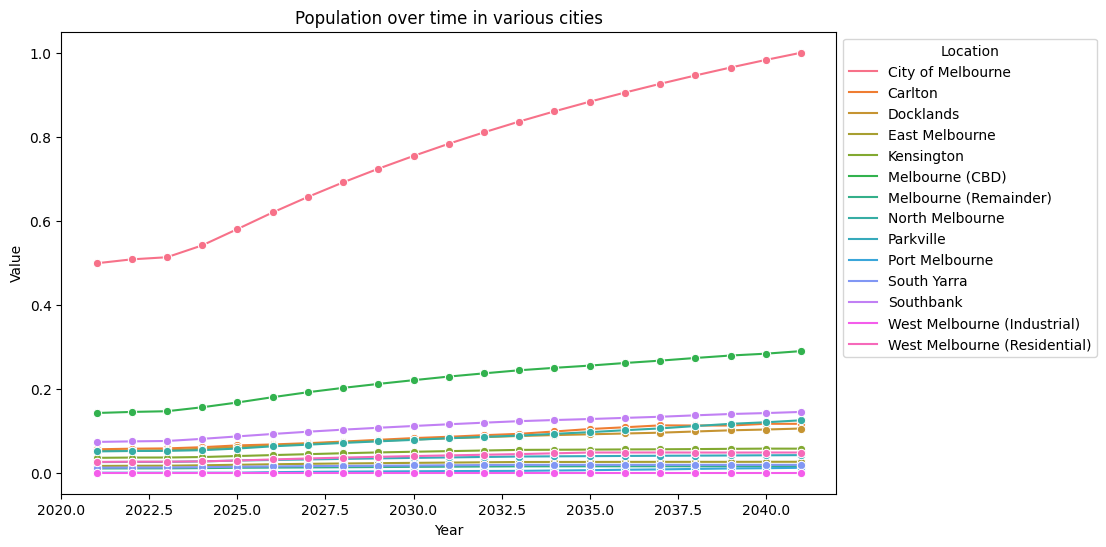

In [44]:
x = pop[pop.geography.isin(city_names)]


plt.figure(figsize=(10,6))
plot= sns.lineplot(data=x, x='year', y='value', hue='geography', marker='o')
plt.title('Population over time in various cities')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend(title='Location')
sns.move_legend(plot, "upper left", bbox_to_anchor=(1, 1))

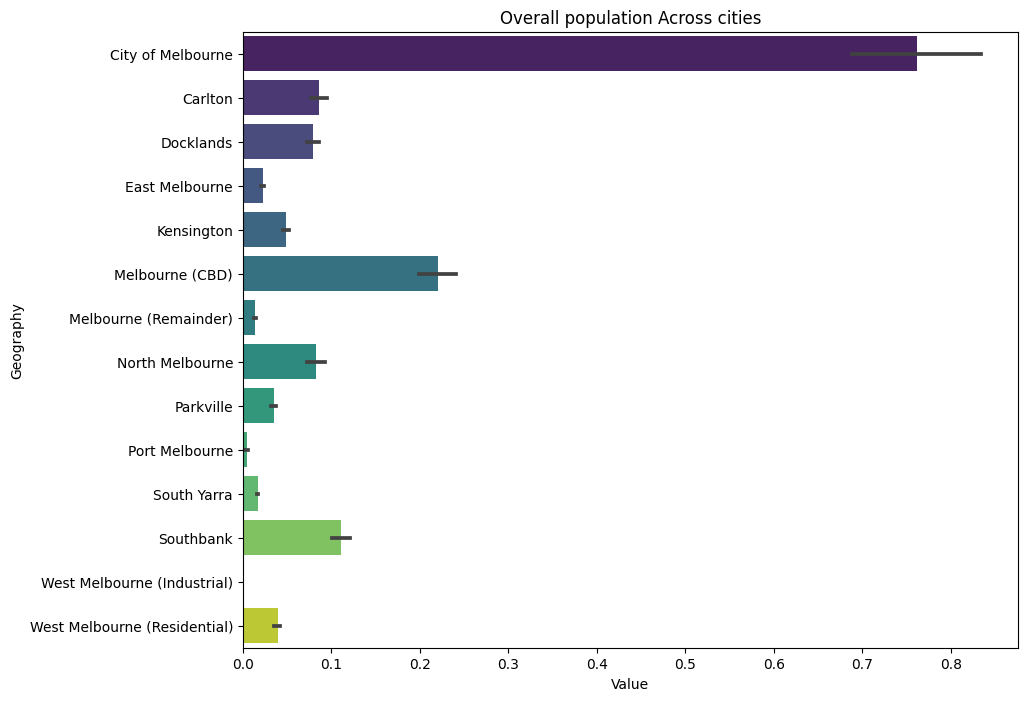

In [45]:
# bar plot 
plt.figure(figsize=(10, 8))
sns.barplot(data=pop, x='value', y='geography', palette='viridis')
plt.title(f'Overall population Across cities')
plt.xlabel('Value')
plt.ylabel('Geography')
plt.show()

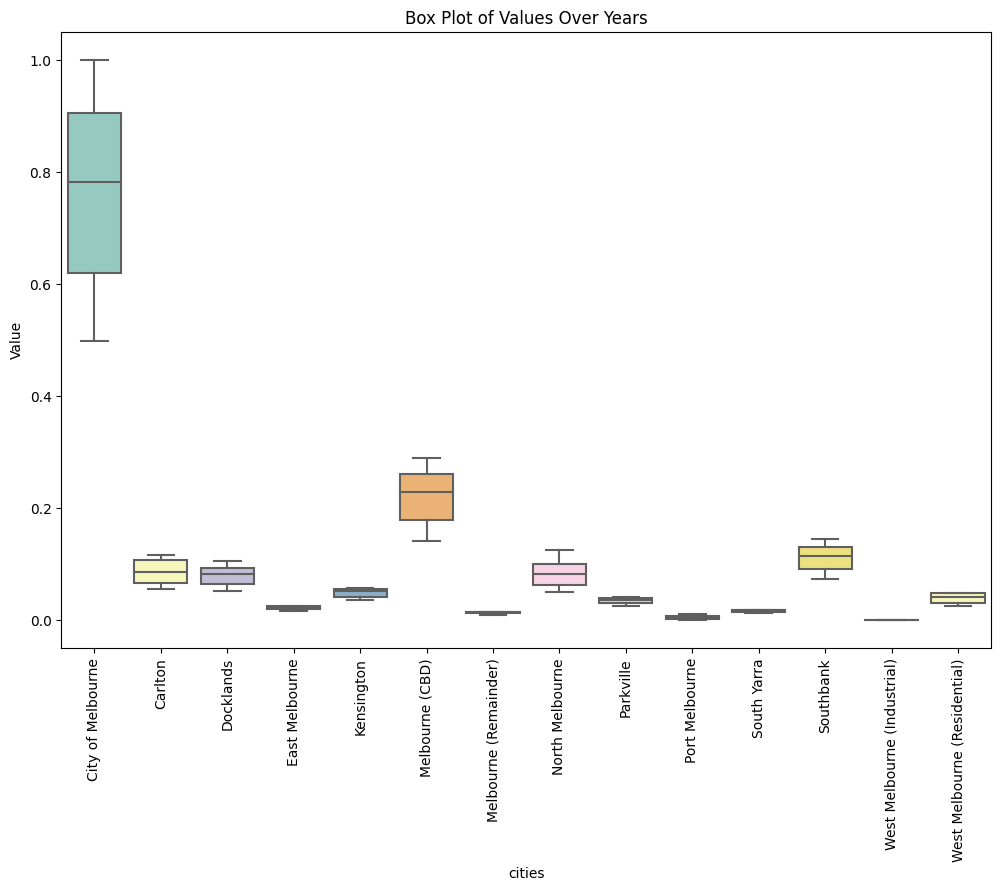

In [46]:
# Plotting box plot using seaborn
plt.figure(figsize=(12, 8))
sns.boxplot(data=pop, x='geography', y='value', palette='Set3')
plt.title('Box Plot of Values Over Years')
plt.xlabel('cities')
plt.xticks(rotation=90)
plt.ylabel('Value')
plt.show()

<p>Tram dataset </p>
<ul>
    Initial visualization to see locations of tram stops 
</ul>

In [47]:
tram.head(3)

,stop_name,lat_tram,lon_tram
0,Market Street / Flinders Street,-37.819223,144.961401
1,Victoria Police Centre / Flinders Street,-37.821539,144.953569
2,Central Pier / Harbour Esplanade,-37.815427,144.945121


In [48]:
import folium

map = folium.Map(location = [tram["lat_tram"].iloc[0], tram["lon_tram"].iloc[0]], zoom_start=-1)

for i, rows in tram.iterrows():
    folium.Marker(location=[rows["lat_tram"], rows["lon_tram"]], tooltip=rows['stop_name']).add_to(map)

min_val = tram[['lat_tram', 'lon_tram']].min().values.tolist()
max_val = tram[['lat_tram', 'lon_tram']].max().values.tolist()

map.fit_bounds([min_val, max_val]) 


map

<p>Metro station dataset </p>
<ul>
    Initial visualization to see locations of metro station stops 
</ul>

In [49]:
metro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   station_name  219 non-null    object 
 1   lat_metro     219 non-null    float64
 2   lon_metro     219 non-null    float64
dtypes: float64(2), object(1)
memory usage: 5.3+ KB


In [50]:
map = folium.Map(location = [metro["lat_metro"].iloc[0], metro["lon_metro"].iloc[0]], zoom_start=10)

for i, rows in metro.iterrows():
    folium.Marker(location=[rows["lat_metro"], rows["lon_metro"]], tooltip=rows['station_name']).add_to(map)

min_val = metro[['lat_metro', 'lon_metro']].min().values.tolist()
max_val = metro[['lat_metro', 'lon_metro']].max().values.tolist()

map.fit_bounds([min_val, max_val]) 


map

In [51]:
bus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   lat_bus  309 non-null    float64
 1   lon_bus  309 non-null    float64
dtypes: float64(2)
memory usage: 5.0 KB


<p>Bus stop dataset </p>
<ul>
    Initial visualization to see locations of bus stops 
</ul>

In [52]:
map = folium.Map(location = [bus["lat_bus"].iloc[0], bus["lon_bus"].iloc[0]], zoom_start=10)

for i, rows in bus.iterrows():
    folium.Marker(location=[rows["lat_bus"], rows["lon_bus"]]).add_to(map)

min_val = bus[['lat_bus', 'lon_bus']].min().values.tolist()
max_val = bus[['lat_bus', 'lon_bus']].max().values.tolist()

map.fit_bounds([min_val, max_val]) 


map

# Goals for this/next week
<ul>
    <li><FONT COLOR="cyan">  SELF NOTE - Reverse geolocate the latitude and longitude to find the name of the places in each dataset (Tram, metroo and bus stop )  </li>
    <li><FONT COLOR="cyan">  Find the number of services in each area.   </li>
    <li><FONT COLOR="cyan">  Find the total number for the current year so far - till 2024</li>
    <li><FONT COLOR="cyan">  Create a model to estimate the number of services that will be needed based on the city and its individual population  </li>
    <li><FONT COLOR="cyan">  Maybe create a new dataframe that is only for transportation services and use that to create models/predictions  </li>
</ul>

In [53]:
# Planning to drop the Tram dataset alltogether 
pop.head()

,geography,year,value
5620,City of Melbourne,2021,0.498634
5621,City of Melbourne,2025,0.580116
5622,City of Melbourne,2028,0.691288
5623,City of Melbourne,2029,0.723781
5624,City of Melbourne,2033,0.836179


<h3>Models </h3>

In [57]:
pop_new = pop.pivot_table(index="geography", columns="year", values="value", aggfunc='first')
pop_new

year,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030,...,2032,2033,2034,2035,2036,2037,2038,2039,2040,2041
geography,,,,,,,,,,,,,,,,,,,,,
Carlton,0.055761,0.057202,0.057886,0.060771,0.065028,0.067306,0.070343,0.074097,0.078335,0.082462,...,0.089360,0.092605,0.098212,0.104004,0.108238,0.112710,0.112450,0.112359,0.116503,0.116412
City of Melbourne,0.498634,0.508040,0.513070,0.541296,0.580116,0.619679,0.656627,0.691288,0.723781,0.754265,...,0.810458,0.836179,0.860437,0.883371,0.905146,0.925965,0.945832,0.964785,0.982845,1.000000
Docklands,0.051676,0.052636,0.053334,0.057046,0.061157,0.064882,0.068957,0.072650,0.075995,0.079081,...,0.084818,0.087459,0.089617,0.091476,0.093390,0.095344,0.098180,0.100980,0.102852,0.105231
East Melbourne,0.016120,0.016519,0.016694,0.017697,0.018923,0.020127,0.021178,0.022016,0.022749,0.023466,...,0.024839,0.025513,0.025617,0.025715,0.025793,0.025883,0.025896,0.025919,0.026023,0.026062
Kensington,0.035475,0.036072,0.036234,0.037344,0.039738,0.041984,0.044174,0.046374,0.048340,0.049917,...,0.052899,0.054353,0.054713,0.055050,0.055459,0.055781,0.056274,0.056887,0.057361,0.057283
Melbourne (CBD),0.142201,0.144739,0.146416,0.155845,0.167209,0.179834,0.191648,0.202005,0.211435,0.220345,...,0.236588,0.243908,0.249739,0.255037,0.261245,0.266865,0.273198,0.279068,0.283429,0.289558
Melbourne (Remainder),0.010127,0.010302,0.010386,0.010971,0.011772,0.012194,0.012612,0.013031,0.013534,0.013962,...,0.014780,0.015179,0.015237,0.015293,0.015331,0.015383,0.015377,0.015387,0.015445,0.015461
North Melbourne,0.050790,0.051715,0.052030,0.053701,0.057585,0.062880,0.066783,0.070901,0.074655,0.078199,...,0.085327,0.088377,0.092563,0.096583,0.101210,0.105493,0.111146,0.116438,0.120082,0.124822
Parkville,0.025351,0.025708,0.025789,0.026948,0.028982,0.030303,0.031614,0.032860,0.034102,0.035293,...,0.037500,0.038548,0.039018,0.039482,0.039923,0.040371,0.040705,0.041059,0.041497,0.041874
